In [1]:
### Imports and data ###

#Imports
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

import datetime as dt
import matplotlib as style
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler

#Get Data from yahoo

start = dt.datetime(2001,1,1)
end = dt.datetime(2016,12,31)
df = web.DataReader('AAPL', 'yahoo', start, end)[['Close']]

Using TensorFlow backend.


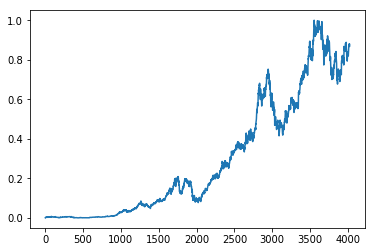

In [2]:
#Format data for use

df = df.values.reshape(len(df), 1)
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)

plt.plot(df)
plt.show()

data_split = 0.8
train_data = df[:int(len(df)*data_split)]
test_data = df[int(len(df)*data_split):]

In [3]:
def create_ts(ds, inLen, outLen):
    X, Y = [], []
    totLen = inLen+outLen
    for i in range(len(ds)-totLen-1):
        X.append(ds[i:(i+inLen), 0])
        Y.append(ds[(i+inLen):(i+totLen), 0])
    return np.array(X), np.array(Y)

in_series = 100
out_series = 22

x_train, y_train = create_ts(train_data, in_series, out_series)
x_test, y_test = create_ts(test_data, in_series, out_series)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [4]:
#Create the model

model = Sequential()

model.add(LSTM(4, input_shape=(in_series, 1)))
model.add(Dense(out_series))

model.compile(loss='mse', optimizer='adam')

In [5]:
#Fit the model to the training data

model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
3097/3097 [==============================] - 3s 1ms/step - loss: 0.0501
Epoch 2/25
3097/3097 [==============================] - 3s 879us/step - loss: 0.0148
Epoch 3/25
3097/3097 [==============================] - 3s 889us/step - loss: 0.0040
Epoch 4/25
3097/3097 [==============================] - 3s 883us/step - loss: 0.0019
Epoch 5/25
3097/3097 [==============================] - 3s 873us/step - loss: 0.0012
Epoch 6/25
3097/3097 [==============================] - 3s 877us/step - loss: 8.9748e-04
Epoch 7/25
3097/3097 [==============================] - 3s 871us/step - loss: 7.2561e-04
Epoch 8/25
3097/3097 [==============================] - 3s 881us/step - loss: 6.2616e-04
Epoch 9/25
3097/3097 [==============================] - 3s 883us/step - loss: 5.6493e-04
Epoch 10/25
3097/3097 [==============================] - 3s 880us/step - loss: 5.2401e-04
Epoch 11/25
3097/3097 [==============================] - 3s 871us/step - loss: 4.9286e-04
Epoch 12/25
3097/3097 [==================

In [6]:
#Attempt to predict the test data

pred = model.predict(x_test)

pred = scaler.inverse_transform(pred)
test_data = scaler.inverse_transform(test_data)
y_test = scaler.inverse_transform(y_test)

print(pred[50]-y_test[50])

[-5.28472137 -5.2688446  -2.93281555 -6.74417877 -8.16178131 -7.79721069
 -8.25706482 -7.12330627 -7.76987457 -5.53536987 -4.41584778 -3.36703491
 -5.01451874 -5.68264771 -5.94187164 -6.24758148 -5.25354004 -2.71560669
 -4.41709137 -4.34835815 -3.55280304 -5.47215271]


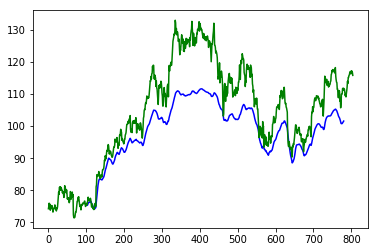

In [14]:
plt.plot(range(99, test_data.shape[0]-24), pred[:,0], color='blue')
plt.plot(test_data, color='green')
plt.show()

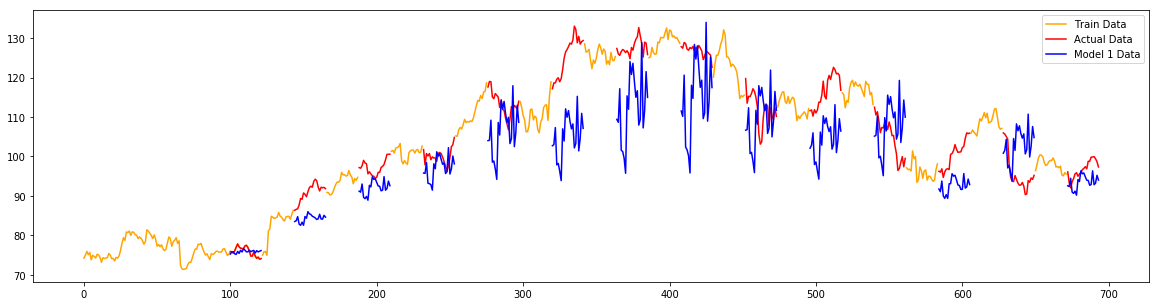

In [8]:
act_vals = 22
pred_vals = 22
tot_vals = act_vals + pred_vals

plt.figure(figsize=(20,5))

plt.plot(range(100+act_vals), test_data[:100+act_vals], color='orange', label='Train Data')
plt.plot(range(100, 100+pred_vals), test_data[100:100+pred_vals], color='red', label='Actual Data')
plt.plot(range(100, 100+pred_vals), pred[0], color='blue', label='Model 1 Data')

for x in range(100+pred_vals, x_test.shape[0]-pred_vals, tot_vals):
    plt.plot(range(x, x+act_vals), test_data[x:x+act_vals], color='orange')
    plt.plot(range(x+act_vals, x+tot_vals), test_data[x+act_vals:x+tot_vals], color='red')
    plt.plot(range(x+act_vals, x+tot_vals), pred[x-100+act_vals], color='blue')
plt.legend()
plt.show()

In [9]:
#Predict training data

pred2 = model.predict(x_train)

pred2 = scaler.inverse_transform(pred2)
train_data = scaler.inverse_transform(train_data)
y_train = scaler.inverse_transform(y_train)

print(pred2[50]-y_train[50])

[0.48225439 0.29800868 0.76085126 0.62513077 0.30108857 0.89225924
 0.83983004 0.66588759 1.06206965 0.98872411 0.97339559 0.92021894
 0.8735373  0.69439089 0.5290184  0.91245079 0.85227835 0.93248069
 1.06751657 0.85784602 0.83375573 0.81420982]


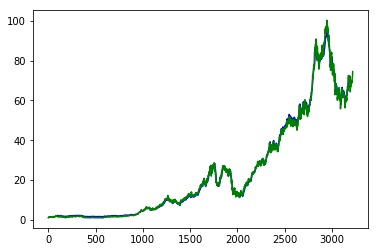

In [10]:
plt.plot(range(100, train_data.shape[0]-23), pred2[:,0], color='blue')
plt.plot(train_data, color='green')
plt.show()

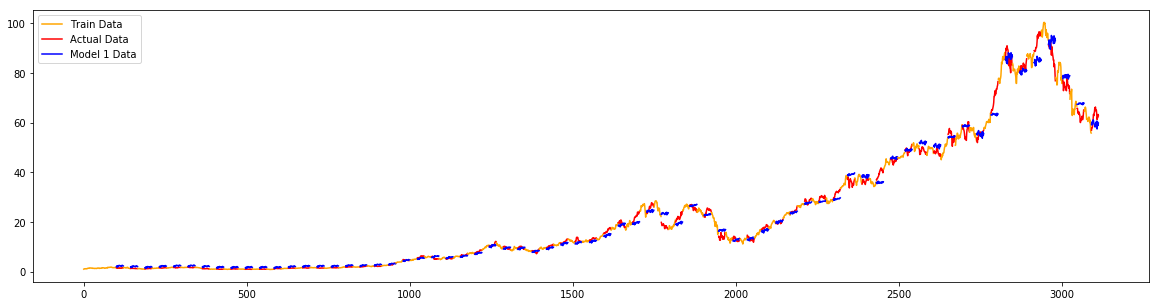

In [13]:
act_vals = 22
pred_vals = 22
tot_vals = act_vals + pred_vals

plt.figure(figsize=(20,5))

plt.plot(range(100+act_vals), train_data[:100+act_vals], color='orange', label='Train Data')
plt.plot(range(100, 100+pred_vals), train_data[100:100+pred_vals], color='red', label='Actual Data')
plt.plot(range(100, 100+pred_vals), pred2[0], color='blue', label='Model 1 Data')

for x in range(100+pred_vals, x_train.shape[0]-pred_vals, tot_vals):
    plt.plot(range(x, x+act_vals), train_data[x:x+act_vals], color='orange')
    plt.plot(range(x+act_vals, x+tot_vals), train_data[x+act_vals:x+tot_vals], color='red')
    plt.plot(range(x+act_vals, x+tot_vals), pred2[x-100+act_vals], color='blue')
plt.legend()
plt.show()